In [1]:
"""Sklearn lesson."""

'Sklearn lesson.'

In [2]:
# выведем содержимое словаря с помощью функции pprint()
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# импортируем модуль stats из библиотеки scipy
import scipy.stats as st
import seaborn as sns

# flake8: noqa: VNE001
# pylint: disable=C0302
# pylint: disable=C0301

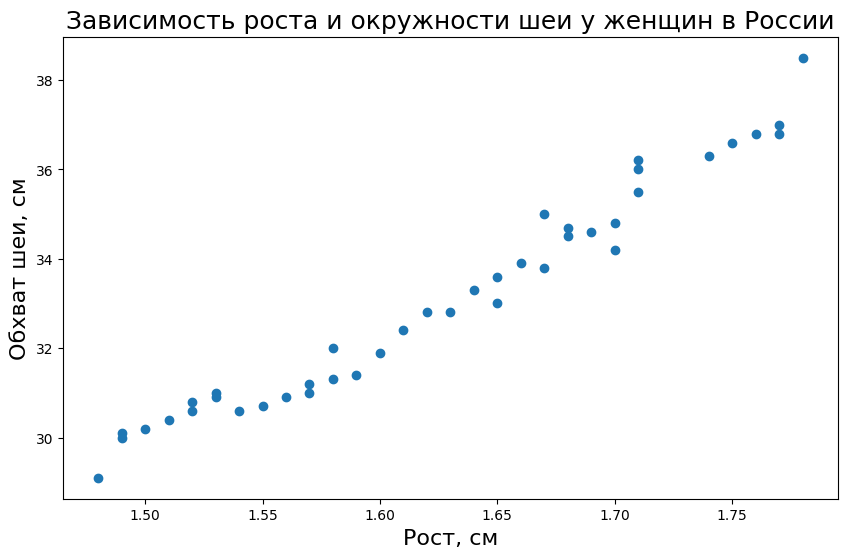

In [3]:
# соберем данные для роста и обхвата шеи
height_women_new = [
    1.48,
    1.49,
    1.49,
    1.50,
    1.51,
    1.52,
    1.52,
    1.53,
    1.53,
    1.54,
    1.55,
    1.56,
    1.57,
    1.57,
    1.58,
    1.58,
    1.59,
    1.60,
    1.61,
    1.62,
    1.63,
    1.64,
    1.65,
    1.65,
    1.66,
    1.67,
    1.67,
    1.68,
    1.68,
    1.69,
    1.70,
    1.70,
    1.71,
    1.71,
    1.71,
    1.74,
    1.75,
    1.76,
    1.77,
    1.77,
    1.78,
]
neck_women_original = [
    29.1,
    30.0,
    30.1,
    30.2,
    30.4,
    30.6,
    30.8,
    30.9,
    31.0,
    30.6,
    30.7,
    30.9,
    31.0,
    31.2,
    31.3,
    32.0,
    31.4,
    31.9,
    32.4,
    32.8,
    32.8,
    33.3,
    33.6,
    33.0,
    33.9,
    33.8,
    35.0,
    34.5,
    34.7,
    34.6,
    34.2,
    34.8,
    35.5,
    36.0,
    36.2,
    36.3,
    36.6,
    36.8,
    36.8,
    37.0,
    38.5,
]
# построим точечную диаграмму
plt.figure(figsize=(10, 6))
plt.scatter(height_women_new, neck_women_original)

# добавим подписи
plt.xlabel("Рост, см", fontsize=16)
plt.ylabel("Обхват шеи, см", fontsize=16)
plt.title("Зависимость роста и окружности шеи у женщин в России", fontsize=18)
plt.show()

In [4]:
# передаем два списка в качестве аргумента и выводим первый элемент
# результата с индексом [0]
# затем округляем результат
np.round(st.pearsonr(height_women_new, neck_women_original)[0], 2)

0.98

Построение модели

Рассмотрим модель, которую называют моделью линейной регрессии, и попробуем с ее помощью математически описать связь роста и обхвата шеи.



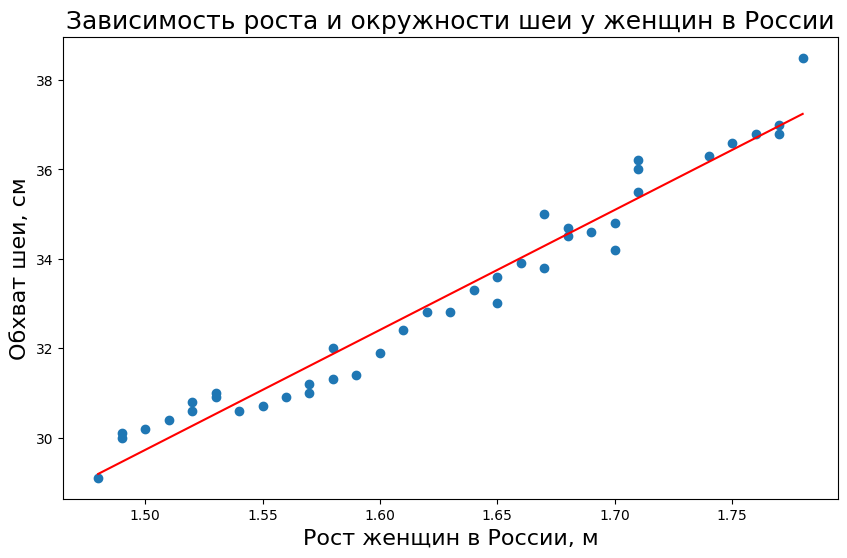

(26.861812005569732, -10.57093629978726)

In [5]:
# у = wx + b
# w, b - веса

X_val = np.array(height_women_new)
neck_women = np.array(neck_women_original)

plt.figure(figsize=(10, 6))
plt.scatter(X_val, neck_women)

slope, intercept = np.polyfit(X_val, neck_women, 1)
# обычная линейная регрессия с 1 параметром, парная регрессия - однофакторная

plt.plot(X_val, X_val * slope + intercept, "r")
# добавим подписи
plt.xlabel("Рост женщин в России, м", fontsize=16)
plt.ylabel("Обхват шеи, см", fontsize=16)
plt.title("Зависимость роста и окружности шеи у женщин в России", fontsize=18)
plt.show()
slope, intercept

In [6]:
print(np.round(slope, 2), np.round(intercept, 2))

# предыдущие этапы - зафитить модель, как только я получаю коэф
# линейной регрессии - модель готова к прогнозированию данных

26.86 -10.57


In [7]:
# переменная с ростом нового респондента

new_lady = 1.73

# predict
y_val = slope * new_lady + intercept
np.round(y_val, 2)

# последняя тема в статистике - линейная регрессии

35.9

Граница между статистикой и машинным обучением
что регрессионный анализ, то есть построение модели регрессии, также является разделом статистики и не относится исключительно к области машинного обучения.

Взаимосвязь переменных

   a  b  c  d
0  1  2  6  7
1  4  3  5  4
2  5  5  4  3
3  6  6  3  4
4  9  8  2  6


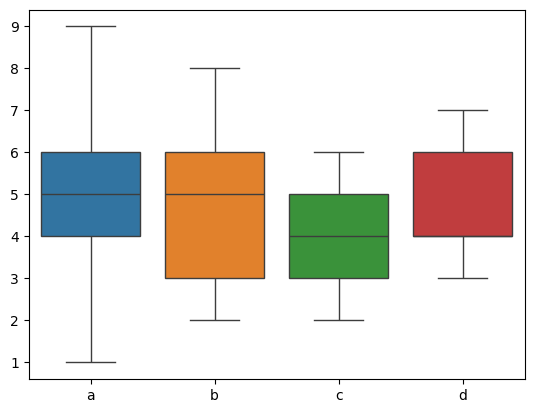

In [8]:
toy_df = pd.DataFrame(
    {
        "a": [1, 4, 5, 6, 9],
        "b": [2, 3, 5, 6, 8],
        "c": [6, 5, 4, 3, 2],
        "d": [7, 4, 3, 4, 6],
    }
)

print(toy_df)
# seaborn настройка над matplotlib и дергает апи от нее,
# более гибкая и функциональная
sns.boxplot(toy_df)
# оценивали несколько датасетов
plt.show()

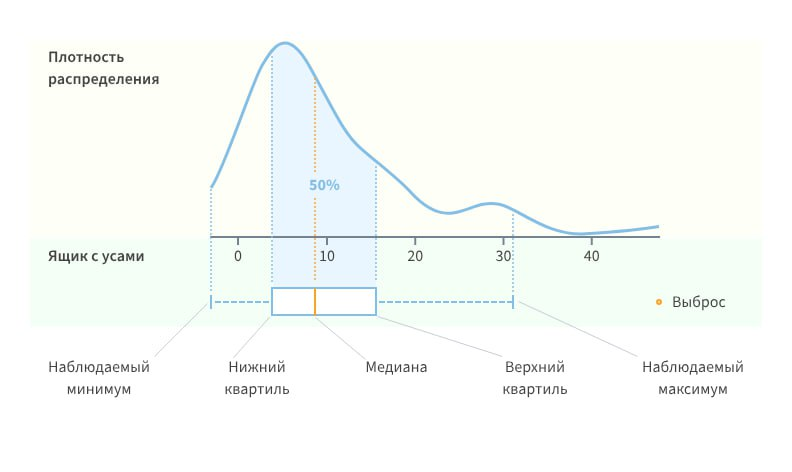

In [9]:
# квартиль  - значение, который делит данные на 4 равные части
# 1-й квартиль (Q1) — 25% данных меньше или равны этому значению.
# 2-й квартиль (Q2) — 50% данных меньше или равны (это же медиана).
# 3-й квартиль (Q3) — 75% данных меньше или равны этому значению.

# межквартильный размах - IQR = Q3 - Q1
# показывает в каком диапазоне лежит 50% данных

# Квантили делят данные на 5 разных частей - расширение от квартилей


# 1-й квинтиль — 20% данных меньше или равны этому значению.
# 2-й квинтиль — 40% данных...
# 3-й квинтиль — 60%...
# 4-й квинтиль — 80%...
# 5-й квинтиль — 100% (максимум)


# Квартили	4	25%, 50%, 75%
# Квинтили	5	20%, 40%, 60%, 80%

In [10]:
data = [1, 3, 5, 7, 8, 9, 10, 12, 15]
# Квартили
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

IQR = q3 - q1
IQR
# метрика устойчива к выбросам, робастная в отличие от СКО
# используется для нахождения выбросов
# q1 -  1,5 * IQR - нижняя граница
# q3 +  1,5 * IQR - верхняя граница


# генеральная и выборочная дисперсия, выборочная
# использует степени свободы чтобы получить несмещенную
# оценку - поправка Бесселя

# Дисперсия не может быть отрицательной, все элементы генеральной
# и выборки идентичны

5.0

In [11]:
print((np.square(toy_df["a"] - toy_df["a"].mean())).sum() / (toy_df.shape[0] - 1))

8.5


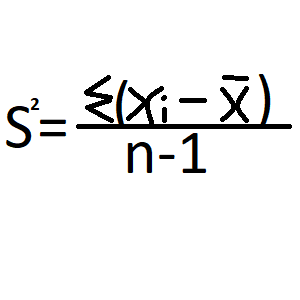

In [12]:
# рассчитаем дисперсию по столбцам с делением на n - 1
print(np.var(toy_df, ddof=1, axis=0))
# Параметр ddof означает Delta Degrees of Freedom (дельта степеней свободы) и
# указывает на размер поправки при расчете дисперсии выборки.

a    8.5
b    5.7
c    2.5
d    2.7
dtype: float64


In [13]:
# ddof = 1 можно не указывать, это параметр по умолчанию
print(toy_df.var())

a    8.5
b    5.7
c    2.5
d    2.7
dtype: float64


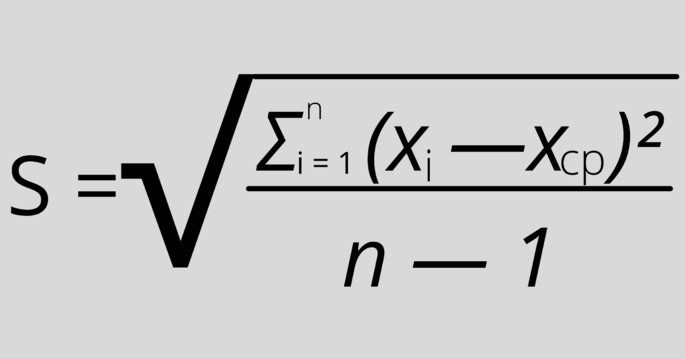

In [14]:
# Среднее квадратическое отклонение
print(
    np.sqrt((np.square(toy_df["a"] - toy_df["a"].mean())).sum() / (toy_df.shape[0] - 1))
)

2.9154759474226504


In [15]:
# для расчета СКО будем также делить на n - 1
np.std(toy_df, ddof=1, axis=0)

a    2.915476
b    2.387467
c    1.581139
d    1.643168
dtype: float64

In [16]:
# для расчета СКО будем также делить на n - 1
np.std(toy_df, ddof=1, axis=0)
# axis = 1 column
# axis = 0 row

a    2.915476
b    2.387467
c    1.581139
d    1.643168
dtype: float64

In [17]:
# опять же, этот параметр установлен по умолчанию, и его можно не указывать
toy_df.std()

a    2.915476
b    2.387467
c    1.581139
d    1.643168
dtype: float64

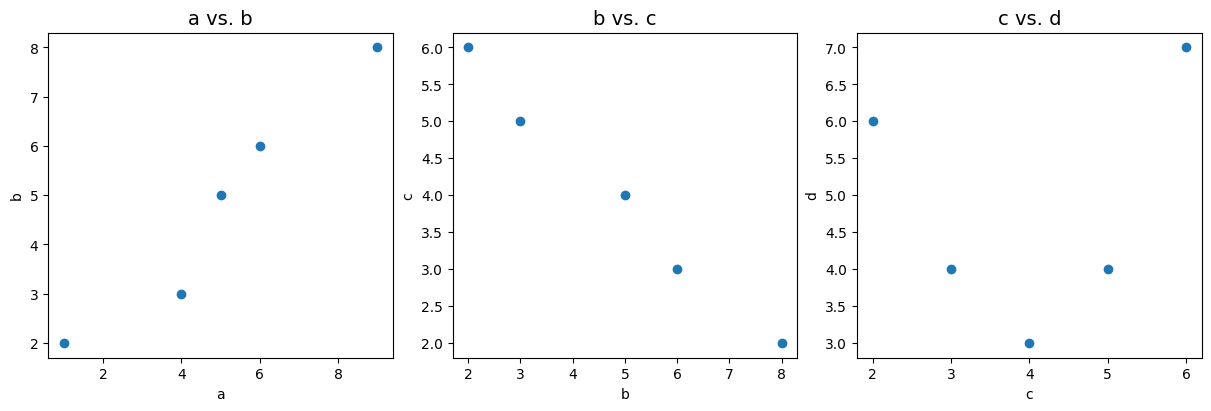

In [18]:
# Ковариация
# Ковариация (covariance) измеряет направление изменения двух переменных.
# Другими словами она позволяет понять, как изменится одна из двух переменных
# при изменении второй.

f, (pair1, pair2, pair3) = plt.subplots(
    nrows=1, ncols=3, figsize=(12, 4), constrained_layout=True
)

# в первый подграфик поместим точечную диаграмму переменных a и b
pair1.scatter(toy_df["a"], toy_df["b"])
pair1.set_title("a vs. b", fontsize=14)
pair1.set(xlabel="a")
pair1.set(ylabel="b")

# во второй - b и c
pair2.scatter(toy_df["b"], toy_df["c"])
pair2.set_title("b vs. c", fontsize=14)
pair2.set(xlabel="b")
pair2.set(ylabel="c")

# в третий - c и d
pair3.scatter(toy_df["c"], toy_df["d"])
pair3.set_title("c vs. d", fontsize=14)
pair3.set(xlabel="c")
pair3.set(ylabel="d")

plt.show()

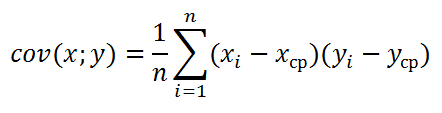

In [19]:
# ковариация представляет собой сумму произведений отклонений переменных от
# своего среднего значения, усредненную на количество наблюдений
# cov_x_y = sum(x_i-x_mean)(y_i-y_mean)/n-1
a = toy_df["a"]
b = toy_df["b"]
mean_a = a.mean()
mean_b = b.mean()
n = toy_df.shape[0]

cov_ab = ((a - mean_a) * (b - mean_b)).sum() / (n - 1)
print(cov_ab)

6.75


In [20]:
# для расчета по столбцам нужно использовать параметр rowvar = False
np.cov(toy_df, ddof=1, rowvar=False)

array([[ 8.5 ,  6.75, -4.5 , -1.  ],
       [ 6.75,  5.7 , -3.75, -0.55],
       [-4.5 , -3.75,  2.5 ,  0.5 ],
       [-1.  , -0.55,  0.5 ,  2.7 ]])

In [21]:
print(toy_df.cov(ddof=1))
# Ковариационная матрица, по диагонали - дисперсия, вне диагонали - ковариация
# любых двух переменных

      a     b     c     d
a  8.50  6.75 -4.50 -1.00
b  6.75  5.70 -3.75 -0.55
c -4.50 -3.75  2.50  0.50
d -1.00 -0.55  0.50  2.70


In [22]:
# Интересно, что если переменные независимы (между ними нет взаимосвязи) —
# ковариация будет равна нулю, при этом обратное не обязательно верно. Если
# ковариация равна нулю, взаимосвязь может быть, просто она нелинейна
# (возможно именно такая взаимосвязь существует между c и d).
# Недостатком ковариации является то, что она измеряет только направление, но
# не силу взаимосвязи. Если мы умножим значения обеих переменных, например, на
# три, то ковариация, исходя из формулы выше, увеличится в девять раз
# (поскольку
# как x, так и y каждой пары переменных умножаются на три), при этом очевидно
# сила взаимосвязи никак не изменится.
# умножим данные на три, рассчитаем ковариацию
# и разделим на ковариационную матрицу исходного датасета,
# чтобы посмотреть масштаб изменения
print((toy_df * 3).cov() / toy_df.cov())
# Этот недостаток исправляет коэффициент корреляции.

     a    b    c    d
a  9.0  9.0  9.0  9.0
b  9.0  9.0  9.0  9.0
c  9.0  9.0  9.0  9.0
d  9.0  9.0  9.0  9.0


In [23]:
# Корреляция
# Корреляция (correlation) между двумя переменными (случайными величинами)
# измеряет не только направление, но и силу взаимосвязи.
# Параметрические и непараметрические тесты
# Параметрические методы (parametric methods) основываются на допущении
# (assumption) или предпосылке о том, как распределена генеральная
# совокупность, из которой взята изучаемая выборка. Например, статистический
# тест может предполагать, что данные имеют нормальное распределение.

# Непараметрические методы (non-parametric) таких допущений соответственно не
# предполагают.

# На практике это означает, что если допущения параметрического теста не
# выполняются, его результат нельзя считать достоверным. Для
# непараметрического теста такое ограничение отсутствует.

# Коэффициент корреляции Пирсона
# r_per = COV_x_y / s_x*s_y
# Деление на произведение СКО выражает любой коэффициент ковариации в единицах
# этого произведения (нормализует его).
# Коэффициент корреляции всегда находится в диапазоне от -1 до 1
# Значения, приближающиеся к указывают на сильную положительную линейную
# корреляцию. Близкие к на сильную отрицательную линейную корреляцию.
# Околонулевые значения предполагают отсутствие линейной корреляции
np.corrcoef(toy_df, rowvar=False).round(2)
# корелляционная матрица, по главной диагонали происходить корреляция между
# самими переменными

array([[ 1.  ,  0.97, -0.98, -0.21],
       [ 0.97,  1.  , -0.99, -0.14],
       [-0.98, -0.99,  1.  ,  0.19],
       [-0.21, -0.14,  0.19,  1.  ]])

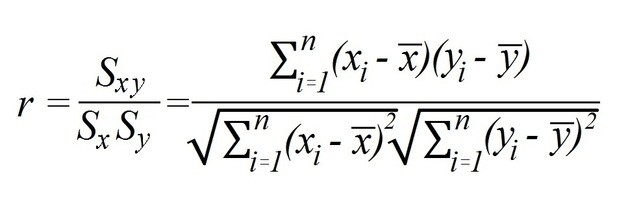

In [24]:
# параметр method = 'pearson' используется по умолчанию,
# его можно не указывать
toy_df.corr(method="pearson").round(2)
# Корреляция переменной с самой собой равна единице, что и отражают значения
# на главной диагонали матрицы. Кроме того, очевидно, что величина X также
# коррелирует с Y, как Y c X.

,a,b,c,d
a,1.00,0.97,-0.98,-0.21
b,0.97,1.00,-0.99,-0.14
c,-0.98,-0.99,1.00,0.19
d,-0.21,-0.14,0.19,1.00


In [25]:
# умножим значения датасета на два и снова рассчитаем коэффициент Пирсона
(toy_df * 2).corr().round(2)
# Корреляционный анализ - изменения масштаба не отражается на коэффициенте
# корреляции

,a,b,c,d
a,1.00,0.97,-0.98,-0.21
b,0.97,1.00,-0.99,-0.14
c,-0.98,-0.99,1.00,0.19
d,-0.21,-0.14,0.19,1.00


In [26]:
# Особенности коэффициента Пирсона

# Замечание 1. Ни ковариация, ни корреляция не устанавливают
# причинно-следственной связи (correlation does not imply causation).
# Замечание 2. Коэффициент корреляции Пирсона измеряет взаимосвязь (1)
# количественных переменных и (2) предполагает, что обе переменные имеют
# нормальное распределение (это и есть упомянутое выше допущение (assumption)
# параметрического теста).
# Замечание 3. Как и в случае с ковариацией, отсутствие линейной корреляции не
# означает отсутствие взаимосвязи. Возможно взаимосвязь есть, но она нелинейна.
# Замечание 4. Более того, на коэффициент корреляции существенное влияние
# оказывают выбросы (outliers).

# Номинальная переменная хранит имя объекта, описание, что это?, название
# объекта
# Категориальная переменная
# Количественная переменная

# Робастная метрика - метрика устойчивая к выбросам(медиана)

In [27]:
anscombe = pd.read_json("../../content/anscombe.json")
anscombe.head()

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


In [28]:
# разобьем данные на четыре части по столбцу Series
series_by_group = [x_ind for _, x_ind in anscombe.groupby("Series")]

# отдельно получим названия каждой из четырех частей
labels = anscombe.Series.unique()
labels

array(['I', 'II', 'III', 'IV'], dtype=object)

In [29]:
# создадим пустой словарь
datasets = {}

# в цикле пройдемся по названиям и значениям переменных x и y каждой из частей
for label, series in zip(labels, series_by_group):
    # каждое название части станет ключом словаря, а переменные x и y -
    # значениями
    datasets[label] = (list(series.X.round(2)), list(series.Y.round(2)))


pprint(datasets)

{'I': ([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
       [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.81, 5.68]),
 'II': ([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
        [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]),
 'III': ([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
         [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]),
 'IV': ([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
        [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])}


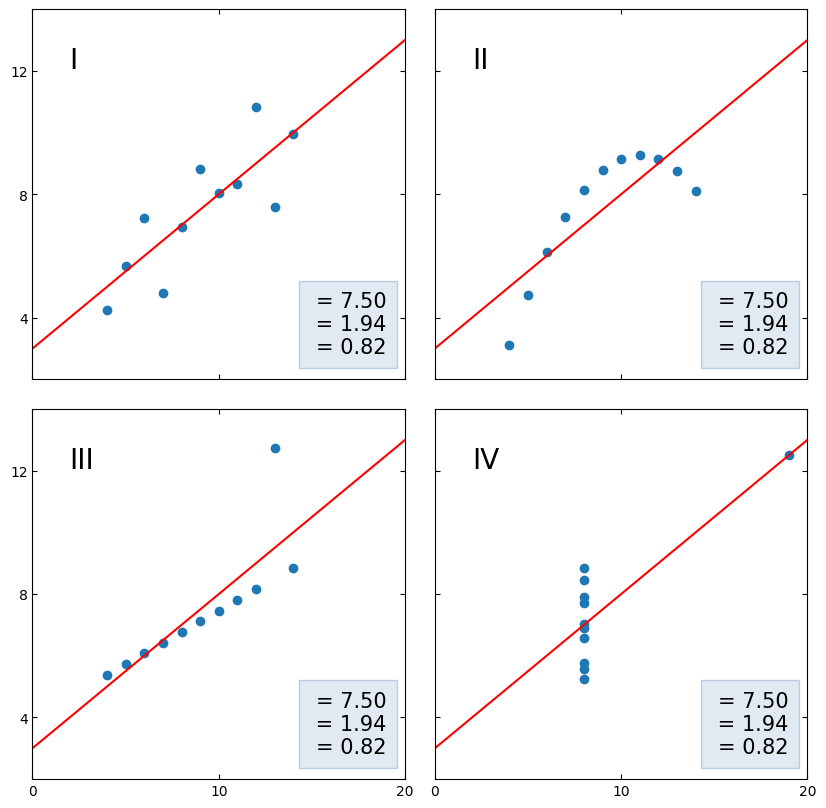

In [30]:
# создадим сетку подграфиков 2 х 2
fig, axs = plt.subplots(
    2,
    2,
    sharex=True,
    sharey=True,
    figsize=(10, 10),
    gridspec_kw={"wspace": 0.08, "hspace": 0.08},
)

# определим границы осей и отметки на осях x и y
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

# пройдемся по подграфикам, а также ключам и значениям словаря datasets
for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):

    # выведем название (номер) группы
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va="top")
    ax.tick_params(direction="in", top=True, right=True)

    # построим точечные диаграммы
    ax.scatter(x, y)

    # обучим модель линейной регрессии
    slope, intercept = np.polyfit(x, y, deg=1)

    # выведем график линейной регрессии
    x_vals = np.linspace(0, 20, num=1000)
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, "r")

    # рассчитаем среднее арифметическое, СКО и корреляцию Пирсона
    stats = (
        f"= {np.mean(y):.2f}\n"
        f" = {np.std(y):.2f}\n"
        f"= {np.corrcoef(x, y)[0][1]:.2f}"
    )

    # создадим отформатированное пространство на графике
    bbox = dict(
        {
            "boxstyle": "square",
            "pad": 0.5,
            "fc": "#c5d4e6",
            "ec": "#89a8cc",
            "alpha": 0.5,
        }
    )

    # и выведем в нем рассчитанные выше статистические показатели
    ax.text(
        0.95,
        0.07,
        stats,
        fontsize=15,
        bbox=bbox,
        transform=ax.transAxes,
        horizontalalignment="right",
    )

plt.show()

In [31]:
# на первом графике прослеживается линейная корреляция без каких-либо
# сюрпризов;
# во втором наборе данных у нас нелинейная зависимость, силу которой мы не
# смогли отразить с помощью коэффициента Пирсона;
# в третьем наборе коэффициент корреляции находится под сильным влиянием
# выброса;
# в четвертом, взаимосвязь по сути отсутствует, и тем не менее одного
# наблюдения оказывается достаточно для появления достаточно сильной корреляции

# Cтандартизация привести к одной единице измерения
# Это формула косинусного сходства двух векторов. Другими словами, коэффициент
# корреляции равен косинусу угла между двумя векторами данных.
# Рассчитаем корреляцию через косинусное сходство с помощью Питона.

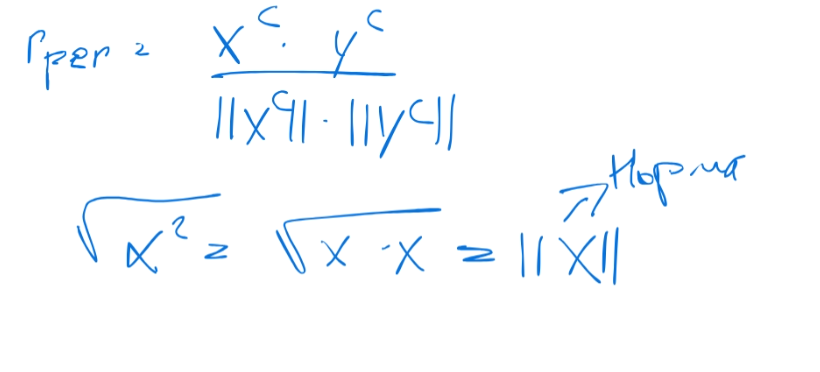

In [32]:
x_vl = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y_vl = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.81, 5.68])
xc = x_vl - np.mean(x_vl)
yc = y_vl - np.mean(y_vl)

# np.dot 1D - скалярное произведение, return скаляр
# np.dot 1D+ - матричное произведение, return матрица
np.round(np.dot(xc, yc) / (np.linalg.norm(xc) * np.linalg.norm(yc)), 2)

0.82

In [33]:
# Корреляция Спирмена
flats = pd.DataFrame(
    {
        "area": [78, 90, 74, 69, 63, 57, 72, 67, 83],
        "price": [9.1, 9.0, 8.9, 8.2, 6.0, 5.8, 8.7, 7.5, 9.2],
    }
)

flats

,area,price
0,78,9.1
1,90,9.0
2,74,8.9
3,69,8.2
4,63,6.0
5,57,5.8
6,72,8.7
7,67,7.5
8,83,9.2


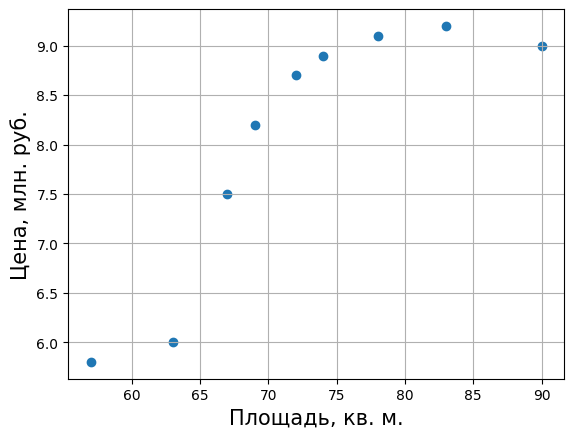

In [34]:
plt.scatter(flats.area, flats.price)
plt.xlabel("Площадь, кв. м.", fontsize=15)
plt.ylabel("Цена, млн. руб.", fontsize=15)
plt.grid()
plt.show()

In [ ]:
flats.corr(method="pearson").iloc[0, 1].round(2)  # type: ignore
# тк связь нелинейная, коэф пирсена мб не точна

0.86

In [36]:
flats["area_rank"] = flats.area.rank(ascending=False)
flats["price_rank"] = flats.price.rank(ascending=False)
flats

,area,price,area_rank,price_rank
0,78,9.1,3.0,2.0
1,90,9.0,1.0,3.0
2,74,8.9,4.0,4.0
3,69,8.2,6.0,6.0
4,63,6.0,8.0,8.0
5,57,5.8,9.0,9.0
6,72,8.7,5.0,5.0
7,67,7.5,7.0,7.0
8,83,9.2,2.0,1.0


In [37]:
flats["diff"] = flats["area_rank"] - flats["price_rank"]
flats["diff_squared"] = np.square(flats["diff"])
flats

n = flats.shape[0]
# применим формулу для расчета коэффициента Спирмена

result = 1 - ((6 * flats["diff_squared"].sum()) / n * (n**2 - 1))
flats[["area", "price"]].corr(method="spearman").iloc[0, 1].round(2)  # type: ignore
# Как мы видим, этот коэффициент гораздо лучше уловил монотонную
# нелинейную зависимость двух переменных.

0.95

In [38]:
flats.corr?

Signature:
flats.corr(
    method: 'CorrelationMethod' = 'pearson',
    min_periods: 'int' = 1,
    numeric_only: 'bool' = False,
) -> 'DataFrame'
Docstring:
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
----------
method : {'pearson', 'kendall', 'spearman'} or callable
    Method of correlation:

    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarrays
        and returning a float. Note that the returned matrix from corr
        will have 1 along the diagonals and will be symmetric
        regardless of the callable's behavior.
min_periods : int, optional
    Minimum number of observations required per pair of columns
    to have a valid result. Currently only available for Pearson
    and Spearman correlation.
numeric_only : bool, default False
    Include only `float`, `int` or `boolean` data.

    .. versionadde

In [ ]:
treatment = pd.DataFrame(
    [[3, 2], [4, 3], [2, 1], [1, 5], [6, 7], [7, 6], [5, 4]],
    columns=["Before", "After"],
)

treatment
# Категориальные порядковые данные

# Как уже было сказано, помимо количественных значений коэффициент Спирмена
# способен измерить направление и силу взаимосвязи категориальных порядковых
# значений

,Before,After
0,3,2
1,4,3
2,2,1
3,1,5
4,6,7
5,7,6
6,5,4


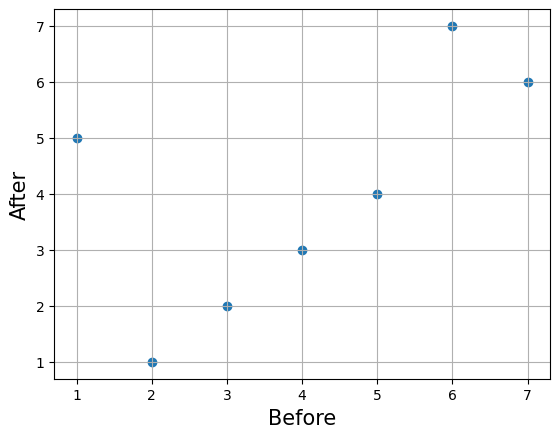

In [40]:
plt.scatter(treatment.Before, treatment.After)
plt.xlabel("Before", fontsize=15)
plt.ylabel("After", fontsize=15)
plt.grid()
plt.show()

In [41]:
treatment["diff"] = treatment["Before"] - treatment["After"]
treatment["diff_sq"] = np.square(treatment["diff"])
treatment

,Before,After,diff,diff_sq
0,3,2,1,1
1,4,3,1,1
2,2,1,1,1
3,1,5,-4,16
4,6,7,-1,1
5,7,6,1,1
6,5,4,1,1


In [42]:
n = treatment.shape[0]
round(1 - ((6 * treatment["diff_sq"].sum()) / (n * (n**2 - 1))), 2)

0.61

In [ ]:
treatment[["Before", "After"]].corr(method="spearman").iloc[0, 1].round(2)  # type: ignore

0.61

In [ ]:
# Коэффициент ранговой корреляции Кендалла
# как и метод Спирмена, может применяться для измерения силы взаимосвязи
# количественных и порядковых категориальных переменных и подходит для анализа
# нелинейных зависимостей. Это также непараметрический тест.

treatment = treatment[["Before", "After"]]
treatment

# Спирмен — проще и быстрее, хорош при подозрении на монотонную зависимость.
# Кендэлл — лучше, если нужны более точные, устойчивые к шуму оценки
# (например, при малом количестве данных).

# пара наблюдений в которых наблюдается негативная тенденция называется
# конкордантной 4 > 2 3 > 1
#  пара наблюдений будет называться (позитивная) дискордантной  6 > 7, 7 < 6

,Before,After
0,3,2
1,4,3
2,2,1
3,1,5
4,6,7
5,7,6
6,5,4


In [ ]:
# 0
# 1 C
# 2 C  C
# 3 D  D  D
# 4 C  C  C  C
# 5 C  C  C  C  D
# 6 C  C  C  D  C  C
#   0  1  2  3  4  5  6

# Получилось 16 конкордантных (C) и 5 дискордантных (D) пар
# общее количество очевидно равно 21

# С(n,k) = n! / (n-k)!k! -> C(7,2) = 7!/(7-2)!2!= 21

# coчетание - это выборка(хотим выбрать 2 книги из 3, выбор 2 человека из 20, порядок не важен)
# форму размещение состоит из 2 - формула перестановок * формула сочетаний
# Выбираем 2 человека из 20 и хотим назначить должность староста и заместителя
n = 7
pairs = (7 * (7 - 1)) // 2
pairs

# Tau = конкондарт пар - дискондарт / total pairs

concordant = 16
discordant = pairs - concordant

np.round((concordant - discordant) / pairs, 2)

0.52

In [ ]:
treatment.corr(method="kendall").iloc[0, 1].round(2)  # type: ignore
# Чем больше доля конкордантных пар, тем больше схожих рангов, а значит
# сильнее взаимосвязь между переменными.

# Коэффициент неопределенности U Тиля

0.52